# Contents

### 1. Preprocessing and EDA
  <b>1.1</b> Null values <br>
  <b>1.2</b> Unique Values<br>
  <b>1.3</b> Drop redundant columns <br>
  <b>1.4</b> Describe dataset <br>
  <b>1.5</b> Visualize the Data <br>
  <b>1.6</b> Parameter-wise analysis <br>
    <b>1.6.1</b> Mean values <br>
    <b>1.6.2</b> Max Return Days <br>
    <b>1.6.3</b> Average Revenue <br>
    <b>1.6.4</b> Total Revenue <br>
    <b>1.6.5</b> Customers Since Months <br>
    <b>1.6.6</b> Response to emails calls and sms <br>
    <b>1.6.7</b> Business Type <br>
    <b>1.6.8</b> VAS Count <br>
  <b>1.7</b> Visualization using TSNE <br>

### 2. Feature importance and selection
  <b>2.1</b> Feature importance<br>
    <b>2.1.1</b> Chi-Square Test<br>
    <b>2.1.2</b> Extra Trees classifier<br>
    <b>2.1.3</b> Correlation Matrix<br>
  <b>2.2</b> Defining new features<br>

### 3. Machine Learning Model
  <b>3.1</b> Baseline Model <br>
  <b>3.2</b> Dealing with class-imbalance <br>
    <b>3.2.1</b> Oversampling with SMOTE<br>
    <b>3.2.2</b> Random Forest<br>
    <b>3.2.3</b> XGBoost<br>
    <b>3.2.4</b> DNN<br>
    <b>3.2.5</b> Support Vector Machine<br>
  <b>3.3</b> Parameter tuning <br>

### 4. SHAP 
  <b>4.1</b> Feature importance in Random Forest <br>
  <b>4.2</b> Individual test case <br>

# Implementation

In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

In [448]:
df=pd.read_csv('taskdata.csv')
df

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.00,0.00,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.00,0.00,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.00,0.00,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.00,0.00,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.00,0.00,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,73498690100,113.0,1,1.000000,4,0.00,0.00,0.000000,0.000000,3,0.0,4.666667,2.000000,9.666667,14.666667,0.333333,0
4403,73519239100,1017.0,1,1.000000,2,0.00,0.00,0.000000,0.000000,4,0.0,153.000000,76.500000,9.000000,11.500000,0.000000,0
4404,73525763100,226.0,1,1.000000,2,0.00,0.00,0.000000,0.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
4405,73538605100,226.0,1,1.000000,2,551.19,551.19,7.000000,70.000000,1,0.0,17.000000,17.000000,10.000000,8.000000,0.000000,0


# 1. Pre-processing and Exploratory Data Analysis

## 1.1 Null values

In [449]:
df.isna().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

#### Insights :
Only the account_id value has 7 missing values, hence the rest of the data is complete.

## 1.2 Unique values for each variable

In [450]:
df.nunique(axis=0)

user_id                  4407
account_id                 15
max_return_days           229
average_return_days       917
customer_since_months      23
total_revenue             434
average_revenue           510
avg_vas_count             677
avg_used_vas_value       1027
business_type               6
avg_wallet_bonus          989
avg_active_ads           2757
avg_new_ads              1422
avg_email_replies        1900
avg_call_replies         1932
avg_sms_replies           140
target                      2
dtype: int64

#### Insights : 
Business type is a categorical variable with 6 possible categories, and the outcome variable target, is binary. The rest are numeric features.

## 1.3 Drop redundant columns : account_id and user_id

In [451]:
d=df.drop(['user_id','account_id'],axis=1)
d.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


## 1.4 Describe New dataset

In [452]:
d.describe()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


#### Insights 

Return days : On an average, customers take 22 days between consecutive purchashes. The maximum is 354 days. Upto 50% of the customers seem to shop with high frequency, as the 'return_days' value is just 2 days.



Over half the customers; have been customers for 12 months or more. No user has been paying for more than 24 months or 2 years.


Total revenue : The total revenue is characterized by a very high deviation in behavior of customers, as evidenced by the high standard deviation. While MAJORITY of users make no purchase at all, there are outliers with revenue as high as 43,000. 

Average revenue : Average revenue follows trends very similar to total revenue.

Vas count and Used vas count : This describes the use of value added services. 

Business_type : the only categorical feature, customers belong to one of 6 different business type values.

Advertisements : The number of current and new ads directed towards the customer, can be used to understand the effectiveness of marketing campaigns.

Replies to mails, sms and calls : The responsiveness of the customer : while most customers have values in the double digits, there is a steep rise in the case of some outliers



## 1.5 Visualize the spread of data

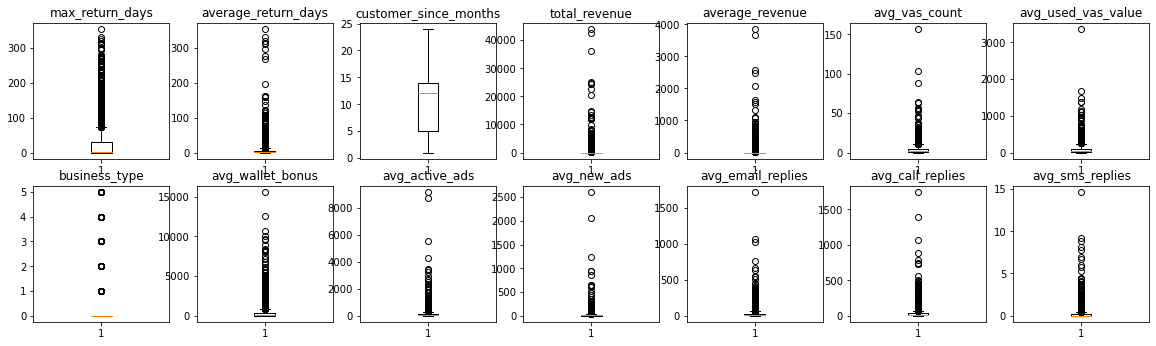

In [453]:
from matplotlib.pyplot import figure
fig, (ax,ax1) = plt.subplots(2,7,figsize=(20,5.5))

l=list(d.columns)
for i in range(7):
    ax[i].boxplot(d[l[i]])
    ax[i].title.set_text(l[i])
for i in range(7):
    ax1[i].boxplot(d[l[7+i]])
    ax1[i].title.set_text(l[i+7])



#### Insights :
Thus we can visualize the spread of every variable. It can be noted that most features are condensed in a small region and have significant number of outliers, except for the 'customer_since_months' feature, which is evenly spread. The data suggests we might have to do outlier detection and removal.

## 1.6 Further parameter Wise analysis

### 1.6.1 Comparison by target value

In [454]:
d.groupby('target').agg('mean')

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
target,,,,,,,,,,,,,,
0,18.268472,6.091594,10.286184,211.240513,18.045957,3.468413,77.219428,0.495698,360.527017,101.139858,16.484542,27.008584,29.181625,0.172953
1,57.661538,16.551990,6.294505,45.516507,7.359301,1.347000,27.818196,0.516484,150.579758,79.660840,19.656238,14.150024,14.077005,0.066948


#### Insights:
Analysis of the mean values shows that for target value '1', which means customer stays, the return days parameter is higher. Also, the revenue is higher for category 0, ie. customer leaves. These customers are also using more value added services as opposed to category 1. It also follows that customers with target value = 0 are much more responsive to calls, emails and sms.

### 1.6.2 Max return days

In [455]:
d.groupby('target').describe()['max_return_days']

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,3952.0,18.268472,35.879929,1.0,1.0,2.0,29.0,354.0
1,455.0,57.661538,76.439113,1.0,1.0,13.0,93.0,312.0


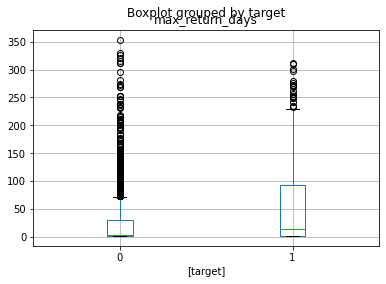

In [456]:
bp = d[['max_return_days','target']].boxplot(by='target')

#### Insights

The 'max_return_days' is higher for customers of category 1. This indicates that customers who stay have a higher purchase period between subsequent purchases.

Looking at the graph, we can set the value of 250 beyond which the item is declared an outlier.

### 1.6.3 Average Revenue

In [457]:
d.groupby('target').describe()['average_revenue']

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,3952.0,18.045957,134.694894,0.0,0.0,0.0,0.0,3852.727273
1,455.0,7.359301,40.994659,0.0,0.0,0.0,0.0,449.848375


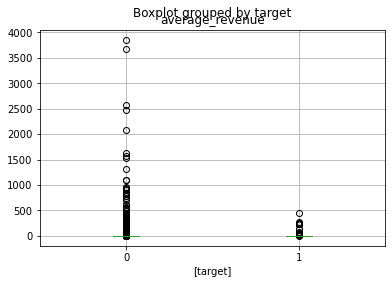

In [458]:
d[['average_revenue','target']].boxplot(by='target')

In [459]:
print(Counter(d.average_revenue>0))
d1=d[d.target==0]
d2=d[d.target==1]
print(Counter(d1.total_revenue>0))
print(Counter(d2.total_revenue>0))

Counter({False: 3835, True: 572})
Counter({False: 3406, True: 546})
Counter({False: 429, True: 26})


#### Insights :
As can be seen, for most customers, of either category, the revenue is zero. Hence, few customers make any purchases at all. The counter shows that only 572 customers have a non-zero revenue. However, of those that do make purchases, target-value=0 have more revenue generated. The maximum average-revenue for category 0 is close to 4000, while that for category 1 is much less, coming in at 500. This indicates that the customers who left, had on average, spent more than customers who have stayed.

### 1.6.4 Total revenue

count     4407.000000
mean       194.130365
std       1548.361547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      43957.172700
Name: total_revenue, dtype: float64


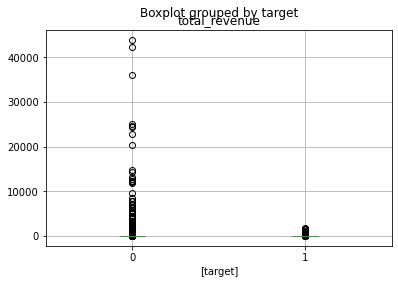

In [460]:
print(d['total_revenue'].describe())
bp = d[['total_revenue','target']].boxplot(by='target')


#### Insights : 
The total revenue, as expected shows a very similar graph to the average_revenue parameter. Again, while most users of BOTH categories spend close to 0, the maximum revenue is very different.

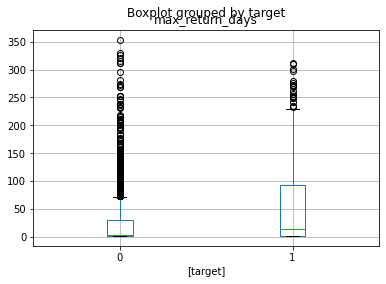

In [461]:
d[['max_return_days','target']].boxplot(by='target')

### 1.6.5 Customers since months

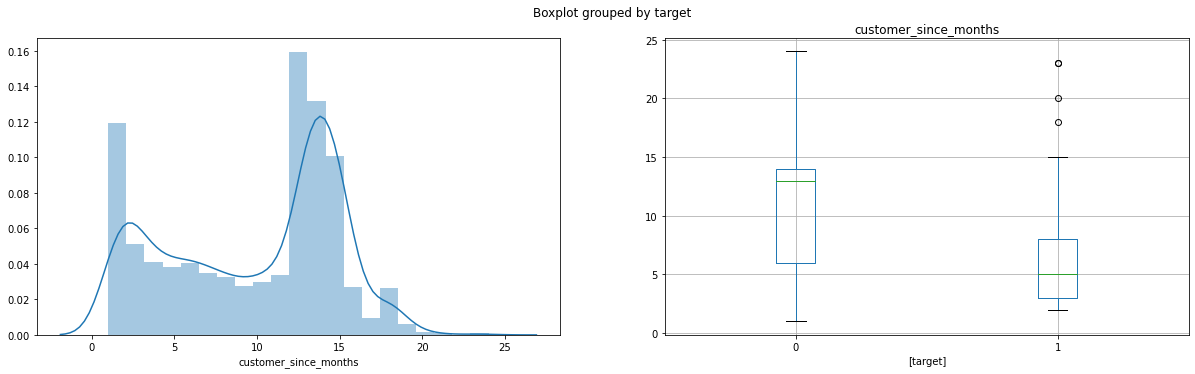

In [462]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(20,5.5))

sns.distplot(d.customer_since_months,ax=ax)
d[['customer_since_months','target']].boxplot(by='target',ax=ax1)

#### Insights:
The distplot shows that the maximum freqeuncy of customers is in the 12-15 month range. There are few, if any, records of customers of over 2 years.


### 1.6.6 Response to emails, calls and sms

#### 1.6.6.1 Spread

In [463]:
d.groupby('target').describe()[['avg_email_replies','avg_sms_replies','avg_call_replies']]

avg_email_replies                                                       \
                   count       mean        std  min  25%        50%       75%   
target                                                                          
0                 3952.0  27.008584  57.405156  0.0  5.0  13.461538  29.54021   
1                  455.0  14.150024  29.621304  0.0  2.2   5.750000  15.00000   

                    avg_sms_replies            ...                       \
                max           count      mean  ...       75%        max   
target                                         ...                        
0       1716.400000          3952.0  0.172953  ...  0.166667  14.636364   
1        372.181818           455.0  0.066948  ...  0.000000   2.076923   

       avg_call_replies                                                        \
                  count       mean        std  min  25%        50%        75%   
target                                                                          
0                3952.0  29.181625  63.615151  0.0  5.0  14.087121  32.099359   
1                 455.0  14.077005  27.745584  0.0  2.0   5.500000  14.416667   

                     
                max  
target               
0       1743.266667  
1        295.846154  

[2 rows x 24 columns]

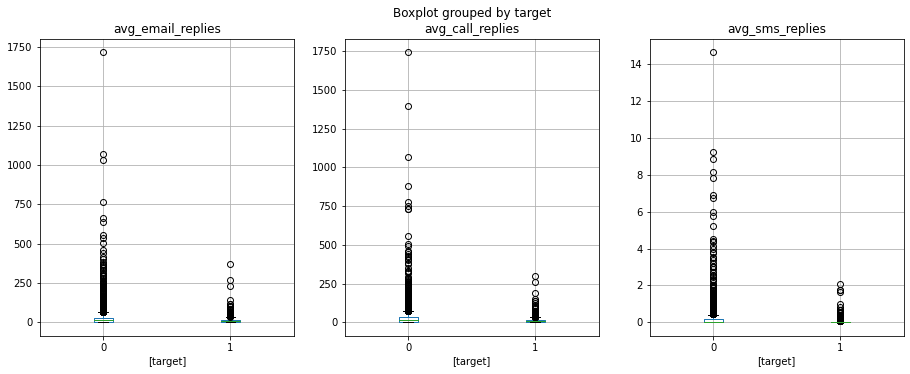

In [464]:
fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,5.5))
d[['avg_email_replies','target']].boxplot(by='target',ax=ax)
d[['avg_call_replies','target']].boxplot(by='target',ax=ax1)
d[['avg_sms_replies','target']].boxplot(by='target',ax=ax2)
plt.show()

#### Insights :

Interestingly, customers who left (target=0) replied much more on average than customers who left (target=1). Most of the data is densely clustered in a small range, with plenty of outliers.

#### 1.6.6.2 Comparison with each other

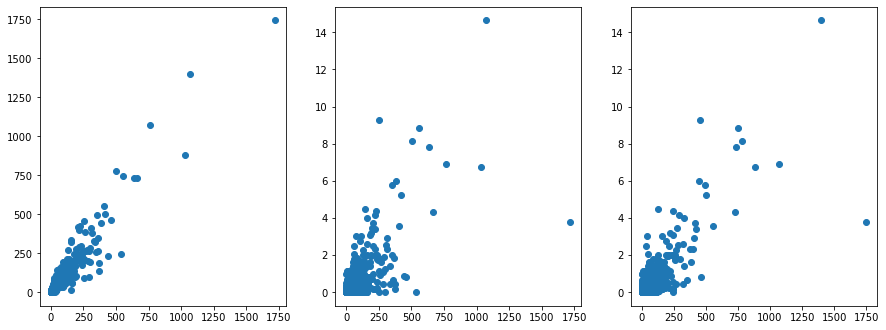

In [465]:
f, axes = plt.subplots(1,3,figsize=(15,5.5))

axes[0].scatter(d.avg_email_replies,d.avg_call_replies,label='xf3f24')
axes[1].scatter(d.avg_email_replies,d.avg_sms_replies)
axes[2].scatter(d.avg_call_replies,d.avg_sms_replies)
plt.show()

#### 1.6.6.3 Revenue vs response

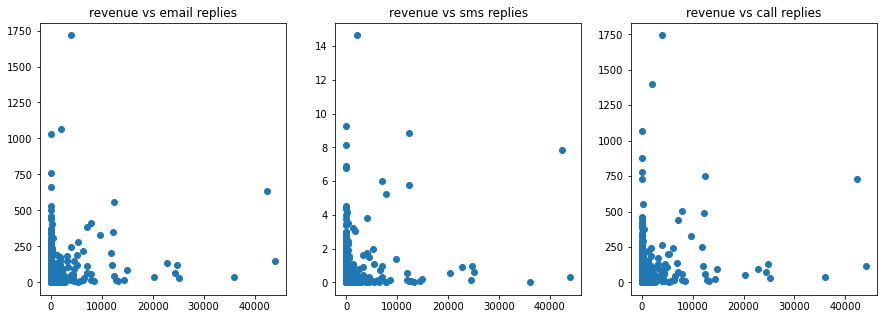

In [466]:
fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,5))
ax.scatter(d.total_revenue,d.avg_email_replies)
ax.title.set_text("revenue vs email replies")
ax1.scatter(d.total_revenue,d.avg_sms_replies)
ax1.title.set_text("revenue vs sms replies")
ax2.scatter(d.total_revenue,d.avg_call_replies)
ax2.title.set_text("revenue vs call replies")


plt.show()

#### Insights :
Curiously, there is not clear relationship between response to communication and revenue generated. People who reply more don't necessarily spend more.

### 1.6.7 Business type

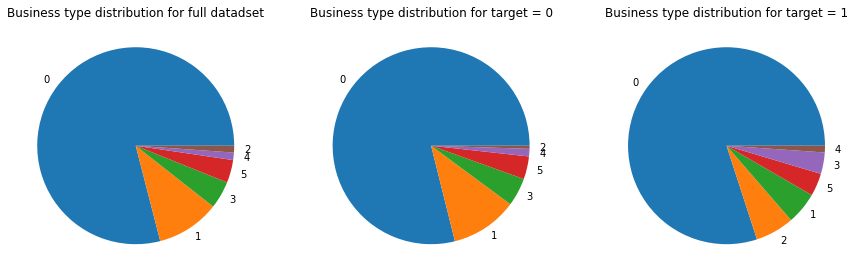

In [467]:
fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,5.5))
d1=d[d.target==0]
d2=d[d.target==1]

x=d.business_type.value_counts()
ax.pie(x.values,labels=x.index)
ax.title.set_text('Business type distribution for full datadset')

x1=d1.business_type.value_counts()
ax1.pie(x1.values,labels=x1.index)
ax1.title.set_text('Business type distribution for target = 0')

x2=d2.business_type.value_counts()
ax2.pie(x2.values,labels=x2.index)
ax2.title.set_text('Business type distribution for target = 1')

plt.show()

#### Insights :
There are 6 categories of business-type, out of which category 0 makes up most of the samples. Even when split by target value, the distribution doesn't change much, which indicates this feature doesn't affect the output variable much,

### 1.6.8 Vas Count

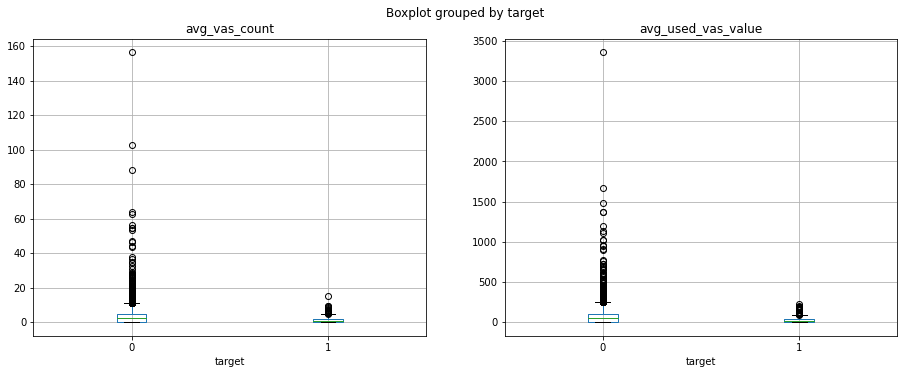

In [468]:
fig, (ax,ax1) = plt.subplots(1,2,figsize=(15,5.5))

d.boxplot('avg_vas_count',by='target',ax=ax)
d.boxplot('avg_used_vas_value',by='target',ax=ax1)


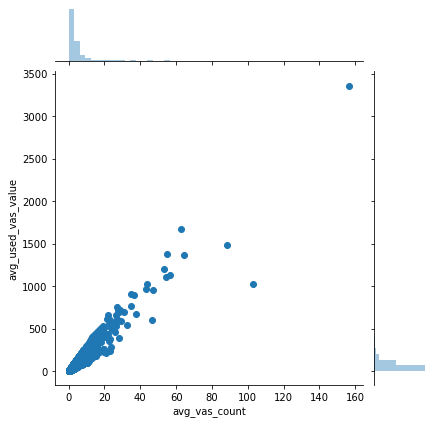

In [469]:
sns.jointplot(d.avg_vas_count,d.avg_used_vas_value)

#### Insights : 
Category 0 customers seem to avail far more of value added services as opposed to category 1.
Outliers do exist which can be removed.

### 1.7 Visualization using TSNE

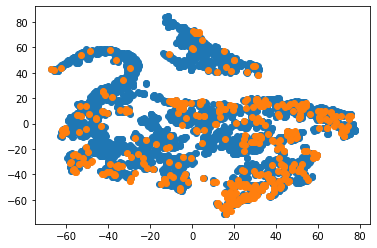

In [440]:
from sklearn.manifold import TSNE


X_embedded = TSNE(n_components=2).fit_transform(X)
for i, t in enumerate(set(Y)):
    idx=Y==t
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)  

### Insights :
The plot shows that the clusters of similar category are grouped togther, but there seems to be some overlap which might make classificaiton difficult

# 2. Feature correlation, importance, and selection

In [470]:
X=d.drop('target',axis=1)
Y=d.target

## 2.1 Feature importance

### 2.1.1 Univariate feature selection with chi-square test

#### Scale the data

In [471]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_Sc = min_max_scaler.fit_transform(X)

In [472]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X_Sc,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(14,'Score'))


                    Specs      Score
0         max_return_days  84.070814
2   customer_since_months  31.852685
1     average_return_days  18.930566
6      avg_used_vas_value   4.112398
5           avg_vas_count   3.609017
8        avg_wallet_bonus   3.400880
13        avg_sms_replies   1.933586
12       avg_call_replies   1.933230
11      avg_email_replies   1.530522
3           total_revenue   1.313206
4         average_revenue   0.713872
9          avg_active_ads   0.207202
10            avg_new_ads   0.093686
7           business_type   0.070815


#### Insights
As can be noted, avg_new_ads and business type have very low importance, and hence these parameters can be possibly dropped.
As expected, the revenue is also not found to be of great importance since most values are 0.

### 2.1.2 Extra-trees classifier

[0.11962762 0.08309255 0.14225886 0.01037551 0.01289641 0.06169784
 0.06560243 0.0476312  0.04969861 0.10164643 0.09788573 0.08547229
 0.08487428 0.03724024]


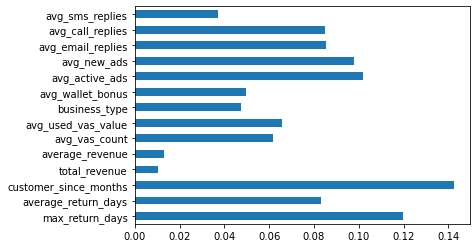

In [473]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

### 2.1.3 Correlation matrix

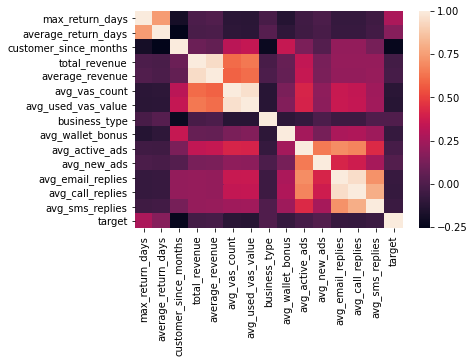

In [474]:
sns.heatmap(d.corr())

No two input variables have a very high correlation.

## 2.2 Defining New features

### Has revenue : Is the user making any purchases

In [475]:
d['rev']=d['total_revenue']>0

### Uses value added services : a binary variable ie. whether the user is availing of value added services or not

In [330]:
d['uses_VAS']=d['avg_used_vas_value']>0

# 3. Building the Classifier

## 3.1 Baseline Model

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Random forest

In [478]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=5,class_weight={0:1,1:1})
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1}, n_estimators=50,
                       random_state=5)

In [479]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

[[3178    1]
 [  10  336]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3179
           1       1.00      0.97      0.98       346

    accuracy                           1.00      3525
   macro avg       1.00      0.99      0.99      3525
weighted avg       1.00      1.00      1.00      3525

0.9968794326241135
0.9838945827232796


In [480]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[764   9]
 [ 91  18]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       773
           1       0.67      0.17      0.26       109

    accuracy                           0.89       882
   macro avg       0.78      0.58      0.60       882
weighted avg       0.87      0.89      0.86       882

0.8866213151927438
0.2647058823529412


#### Insights :
The dataset is highly imbalanced, with target value 0 outnumbering target value 1 with a ratio of nearly 8:1. This explains the inability of the model to learn features of target=1. While the accuracy is high at 88%, the f1 score is poor, since a lot of 1s are misidentified.

## 3.2 Dealing with Class imbalance

### 3.2.1 Oversampling with SMOTE

In [481]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
#X_train, y_train = oversample.fit_resample(X_train, y_train)
X_bal, y = oversample.fit_resample(X, Y)
counter = Counter(y)
print(counter)

Counter({0: 3952, 1: 3952})


The minority class of 1s has been oversampled using SMOTE, to create a balanced dataset

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y, test_size=0.2, random_state=42)

### 3.2.2 Random Forest

In [483]:
classifier = RandomForestClassifier(n_estimators=50, random_state=5,class_weight={0:1,1:1})
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1}, n_estimators=50,
                       random_state=5)

#### Accuracy on Train Data

In [484]:
y_pred = classifier.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

[[3116   15]
 [   0 3192]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3131
           1       1.00      1.00      1.00      3192

    accuracy                           1.00      6323
   macro avg       1.00      1.00      1.00      6323
weighted avg       1.00      1.00      1.00      6323

0.9976277083662818
0.9976558837318332


#### Accuracy on Test Data

In [485]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[759  62]
 [ 45 715]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       821
           1       0.92      0.94      0.93       760

    accuracy                           0.93      1581
   macro avg       0.93      0.93      0.93      1581
weighted avg       0.93      0.93      0.93      1581

0.9323213156230234
0.9303838646714379


### 3.2.3 XGBoost

In [486]:
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

#### Accuracy on train data

In [487]:
y_pred = model.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

[[2604  527]
 [ 333 2859]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3131
           1       0.84      0.90      0.87      3192

    accuracy                           0.86      6323
   macro avg       0.87      0.86      0.86      6323
weighted avg       0.87      0.86      0.86      6323

0.8639886130001582
0.8692611736089997


#### Accuracy on Test data

In [488]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[669 152]
 [ 82 678]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       821
           1       0.82      0.89      0.85       760

    accuracy                           0.85      1581
   macro avg       0.85      0.85      0.85      1581
weighted avg       0.86      0.85      0.85      1581

0.8519924098671727
0.8528301886792453


### 3.2.4 DNN

#### Model

In [414]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical
ops.reset_default_graph()


y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [419]:
model = tf.keras.Sequential()
model.add(Dense(100, activation='relu', input_dim=14))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#### Train model

In [420]:
model.fit(X_train, y_train1, epochs=150, batch_size=32,class_weight={0:1,1:1} )


Epoch 1/150
198/198 [==============================] - 0s 932us/step - loss: 2.3743 - accuracy: 0.6331
Epoch 2/150
198/198 [==============================] - 0s 736us/step - loss: 1.4597 - accuracy: 0.6829
Epoch 3/150
198/198 [==============================] - 0s 753us/step - loss: 1.2412 - accuracy: 0.7177
Epoch 4/150
198/198 [==============================] - 0s 786us/step - loss: 0.9723 - accuracy: 0.7294
Epoch 5/150
198/198 [==============================] - 0s 748us/step - loss: 0.7732 - accuracy: 0.7449
Epoch 6/150
198/198 [==============================] - 0s 801us/step - loss: 0.8929 - accuracy: 0.7307
Epoch 7/150
198/198 [==============================] - 0s 748us/step - loss: 0.7662 - accuracy: 0.7419
Epoch 8/150
198/198 [==============================] - 0s 821us/step - loss: 0.6769 - accuracy: 0.7542
Epoch 9/150
198/198 [==============================] - 0s 724us/step - loss: 0.9018 - accuracy: 0.7549
Epoch 10/150
198/198 [==============================] - 0s 785us/step - l

#### Training Accuracy

In [421]:
pred=model.predict(X_train)
y_pred=[]
for i in pred:
    if(i[0]>i[1]):
        y_pred.append(0)
    else:
        y_pred.append(1)
y_true=[]
for i in y_train1:
    if(i[0]>i[1]):
        y_true.append(0)
    else:
        y_true.append(1)   
        
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred))

[[2925  206]
 [ 225 2967]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3131
           1       0.94      0.93      0.93      3192

    accuracy                           0.93      6323
   macro avg       0.93      0.93      0.93      6323
weighted avg       0.93      0.93      0.93      6323

0.9318361537244979
0.9322859387274156


#### Test accuracy

In [422]:
pred=model.predict(X_test)
y_pred=[]
for i in pred:
    if(i[0]>i[1]):
        y_pred.append(0)
    else:
        y_pred.append(1)
y_true=[]
for i in y_test1:
    if(i[0]>i[1]):
        y_true.append(0)
    else:
        y_true.append(1)   
        
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred))

[[721 100]
 [ 68 692]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       821
           1       0.87      0.91      0.89       760

    accuracy                           0.89      1581
   macro avg       0.89      0.89      0.89      1581
weighted avg       0.89      0.89      0.89      1581

0.8937381404174574
0.8917525773195877


### 3.2.5 SVM

In [489]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [490]:
Counter(clf.predict(X_train))

Counter({1: 3789, 0: 2534})

In [491]:
y_pred = clf.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))
print(f1_score(y_train, y_pred))

[[2148  983]
 [ 386 2806]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      3131
           1       0.74      0.88      0.80      3192

    accuracy                           0.78      6323
   macro avg       0.79      0.78      0.78      6323
weighted avg       0.79      0.78      0.78      6323

0.7834888502293216
0.8038962899298095


#### Test Accuracy

In [429]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[562 259]
 [ 99 661]]
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       821
           1       0.72      0.87      0.79       760

    accuracy                           0.77      1581
   macro avg       0.78      0.78      0.77      1581
weighted avg       0.79      0.77      0.77      1581

0.7735610373181531
0.7869047619047619


   ## 3.3 Results

Therefore, the results obtained are as follows :
#### ROC_AUC Curve for RandomForest

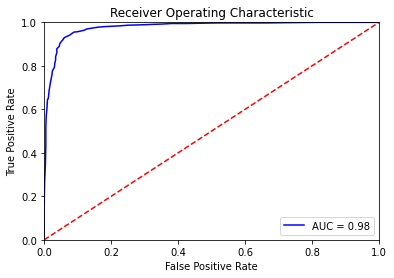

In [513]:
import sklearn.metrics as metrics

probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fp, tp, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fp, tp)

plt.title('Receiver Operating Characteristic')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

| Classifier| Train Accuracy | Train F1-Score | Test Accuracy | Test F1-Score |
|----|---|---|---|---|
| Random Forest  | 99.7 | 99.7 | 93.42 | 93.28 |
| XGBoost  | 86.27 | 86.88 | 85.19 | 85.28 |
|  DNN | 93.18|93.22| 89.37  | 89.17  |
|  SVM |  78.34 |  80.38 | 77.35  | 78.69  |

Therefore, the best performing model is the Random-Forest classifier. It has a train accuracy of 99.7% and test accuracy of 93.4%. The F1 score is also much better than the value before applying SMOTE. Therefore the use of SMOTE has solved the problem of class imbalance.

# 4. SHAP

In [494]:
import shap
import graphviz
import sklearn

## 4.1 Feature importance

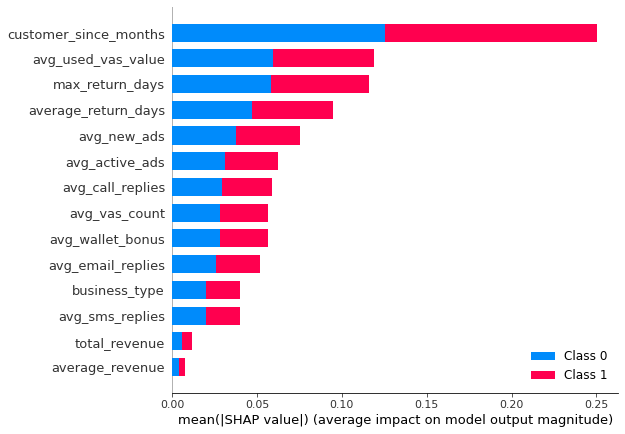

In [502]:
vals = shap.TreeExplainer(classifier).shap_values(X_train)
shap.summary_plot(vals, X_train, plot_type="bar")

The SHAP analysis confirms what we had already uncovered during feature selection and importance. The feature importance plot, clear shows the customer_since_months, vas value and return days being the most dominant features.

In contrast, features of revenue which are near zero for almost all entries, and business type, which has a similar distribution regardless of target value, are of least importance.

## 4.2 On individual example

In [497]:
X_test.head()

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
3467,1,1.000000,14,0.0,0.0,2.166667,59.166667,0,250.0,22.416667,5.083333,24.833333,21.083333,0.25
465,61,28.272727,11,0.0,0.0,1.666667,46.666667,0,300.0,73.000000,11.555556,18.444444,20.444444,0.00
453,42,14.500000,4,0.0,0.0,1.500000,25.000000,0,0.0,33.250000,4.750000,16.500000,19.250000,0.00
4912,1,1.000000,3,0.0,0.0,0.000000,0.000000,0,0.0,10.309329,1.906714,0.786690,2.333333,0.00
4568,111,34.759355,3,0.0,0.0,1.418248,17.452549,0,0.0,26.964479,13.210344,2.599512,3.017760,0.00


In [507]:
X_test.loc[[453]]

,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
453,42,14.5,4,0.0,0.0,1.5,25.0,0,0.0,33.25,4.75,16.5,19.25,0.0


In [508]:
explainer = shap.TreeExplainer(classifier)
choosen_instance = X_test.loc[[453]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

The above visual explains the decision making process of the classifier to arrive at the prediction for the given example.
The red region denotes the feature parameters which 'increase' the prediction value and push it towards 1. The blue region features lower the value, pushing it to 0.
Low number of customer_Since_months = 4, is prominent in records with target value = 1, hence the this feature pushes towards outputting 1. Similarly, avg_used_vas_value=25 also increases the prediction output.
On the other hand, a low max_return_days value of 42 pushes the answer towards 0, as do high media reply values to call and email replies.
Ultimately, the features resulting in output 0 are stronger, and cause a final output of 0.26.
As it happens, the actual class for this record is 0, hence the model prediction is correct.

Given below, another example for target = 1

In [517]:
explainer = shap.TreeExplainer(classifier)
choosen_instance = X_test.loc[[4912]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

# PS : Above visuals in part 4.2 will not be visible on github and can only be shown on jupyter notebook.